# Question 16

Part-A: The separation between slits is given by $\frac{\pi}{\alpha}$

In [3]:
#Part B
#The length scale is considered to be in \mu m
import math
import cmath
import numpy as np
import matplotlib.pyplot as plt


def q(u,s):
    alpha=math.pi/s
    return (math.sin(alpha*u))**2

Text(0, 0.5, 'Intensity')

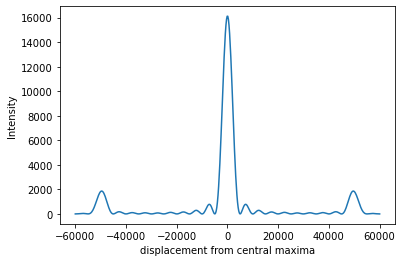

In [4]:
#Part C
#Total length is s*10=200 mu m => w=200

w=200
s=20
wave_l=0.5
f=1e6
l=1e5

from numpy import ones,copy,cos,tan,pi,linspace


def gaussxw(N):

    # Initial approximation to roots of the Legendre polynomial
    a = linspace(3,4*N-1,N)/(4*N+2)
    x = cos(pi*a+1/(8*N*N*tan(a)))

    # Find roots using Newton's method
    epsilon = 1e-15
    delta = 1.0
    while delta>epsilon:
        p0 = ones(N,float)
        p1 = copy(x)
        for k in range(1,N):
            p0,p1 = p1,((2*k+1)*x*p1-k*p0)/(k+1)
        dp = (N+1)*(p0-x*p1)/(1-x*x)
        dx = p1/dp
        x -= dx
        delta = max(abs(dx))

    # Calculate the weights
    w = 2*(N+1)*(N+1)/(N*N*(1-x*x)*dp*dp)

    return x,w

def gaussxwab(N,a,b):
    x,w = gaussxw(N)
    return 0.5*(b-a)*x+0.5*(b+a),0.5*(b-a)*w


def dI(w,s,wave_l,f,x,u,q):
    return math.sqrt(q(u,s))*cmath.exp((2*math.pi*(x)*u*1j)/f)

def I_x(wid,s,wave_l,f,x,N):
    u,w=gaussxwab(N,-wid/2, wid/2)
    val=0
    for i in range(N):
        val+= w[i]*dI(wid,s,wave_l,f,x,u[i],q)
    return (np.absolute(val))**2

x=np.linspace(-6e4, 6e4,500)
I=[]
N=100
for i in range(500):
    I.append(I_x(w,s,wave_l,f,x[i],N))
    
plt.plot(x,I)
plt.xlabel('displacement from central maxima')
plt.ylabel('Intensity')
    
    
    


The sharpness of the peak and parameters like wavelength dictate the number of sample points that we should take. We should not miss the maxima or deform it substantially due to poor choice of sampling points.

Part D

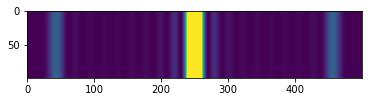

In [5]:
grid=np.zeros((100,500))
for i in range(0,500):
    for j in range(0,100):
        grid[j][i]=I[i]
        
plt.imshow(grid, vmax=6000)

Part E-i

In [6]:
def q_1(u,s):
    alpha=math.pi/s
    beta=math.pi/(2*s)
    return q(u,s)*(math.sin(alpha*u))**2*(math.sin(beta*u))**2

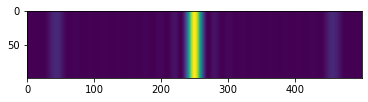

In [7]:
def dI(w,s,wave_l,f,x,u,q):
    return math.sqrt(q(u,s))*cmath.exp((2*math.pi*(x)*u*1j)/f)

def I_x(wid,s,wave_l,f,x,N):
    u,w=gaussxwab(N,-wid/2, wid/2)
    val=0
    for i in range(N):
        val+= w[i]*dI(wid,s,wave_l,f,x,u[i],q_1)
    return (np.absolute(val))**2

x=np.linspace(-6e4, 6e4,500)
I_1=[]
N=100
for i in range(500):
    I_1.append(I_x(w,s,wave_l,f,x[i],N))
    
    
grid_1=np.zeros((100,500))
for i in range(0,500):
    for j in range(0,100):
        grid_1[j][i]=I_1[i]
        
plt.imshow(grid)

Text(0, 0.5, 'Intensity')

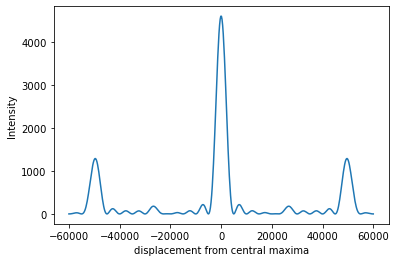

In [8]:
plt.plot(x,I_1)
plt.xlabel('displacement from central maxima')
plt.ylabel('Intensity')

$\textbf{Part E-ii}$

So, we assume that 10$\mu$m slit spans from +30 to +40 $\mu$m and 20 $\mu$m slit spans from -30 to -50 $\mu$m

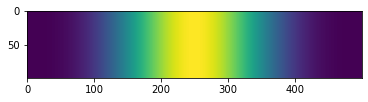

In [16]:
def dI_s(w,s,wave_l,f,x,u):
    return cmath.exp((2*math.pi*(x)*u*1j)/f)

def I_x(wid,s,wave_l,f,x,N, w1, w2):
    u,w=gaussxwab(N,w1,w2)
    val=0
    for i in range(N):
        val+= w[i]*dI_s(wid,s,wave_l,f,x,u[i])
    return (np.absolute(val))**2

x=np.linspace(-6e4, 6e4,500)
I_s=[]
N=100
w1d=30
w1u=40
w2d=-30
w2u=-50
for i in range(500):
    I_s.append(I_x(w,s,wave_l,f,x[i],N,w1d,w1u)+I_x(w,s,wave_l,f,x[i],N,w2d,w2u))
    
    
grid_s=np.zeros((100,500))
for i in range(0,500):
    for j in range(0,100):
        grid_s[j][i]=I_s[i]
        
plt.figure()
plt.imshow(grid_s)